# Machine Learning Engineer Nanodegree
## Capstone Project
## Project: Predicting The Onset of Diabetes Based on Diagnostic Measures

## Stage 0 — Data Preparation

In the code cell below, we import the necessary libraries and import **Pima Indians Diabetes Database** dataset to the Jupyter notebook as DataFrame.

In [1]:
%matplotlib inline
import pandas as pd
print("The version of pandas: {}".format(pd.__version__))
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
diabetes = pd.read_csv('datasets/diabetes.csv')

The version of pandas: 0.20.3


## Stage 1 — Data Exploration
Print the headers of the dataset, find the dimension of the dataset, identity how many persons are diabetic or not, and finally, use `'head()'` function in pandas to take a look at the first five rows in the dataset.

The dimensions of Pima Indians Diabetes Database dataset: (768, 9)
Outcome
0    500
1    268
dtype: int64


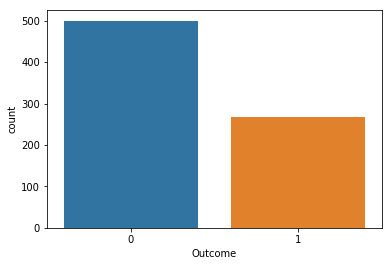

In [2]:
print("The dimensions of Pima Indians Diabetes Database dataset: {}".format(diabetes.shape))
print(diabetes.groupby('Outcome').size())
sns.countplot(diabetes['Outcome'],label="Count")

In [3]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Data Visualization 

Outcome
0    [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
1    [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
dtype: object

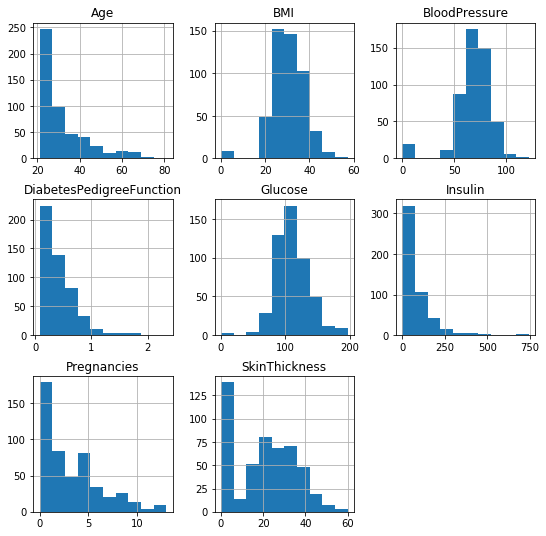

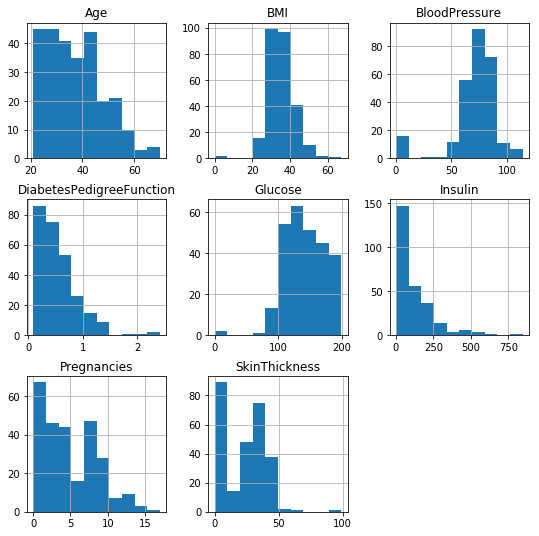

In [4]:
diabetes.groupby('Outcome').hist(figsize=(9, 9))

## Stage 2 — Data Cleaning
In this stage, we further investigate the dataset to see whether there are:
- Missing or null data points.
- Unexpected outliers.

### Missing or Null Data points

In [5]:
print(diabetes.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


### Unexpected Outliers

In [6]:
print("There are total {} zero values for blood pressure".format(diabetes[diabetes.BloodPressure == 0].shape[0]))
print(diabetes[diabetes.BloodPressure == 0].groupby('Outcome').size())
print("")
print("There are total {} zero values for glucose level".format(diabetes[diabetes.Glucose == 0].shape[0]))
print(diabetes[diabetes.Glucose == 0].groupby('Outcome').size())
print("")
print("There are total {} zero values for skin fold thickness".format(diabetes[diabetes.SkinThickness == 0].shape[0]))
print(diabetes[diabetes.SkinThickness == 0].groupby('Outcome').size())
print("")
print("There are total {} zero values for skin fold thickness".format(diabetes[diabetes.SkinThickness == 0].shape[0]))
print(diabetes[diabetes.SkinThickness == 0].groupby('Outcome').size())
print("")
print("There are total {} zero values for BMI".format(diabetes[diabetes.BMI == 0].shape[0]))
print(diabetes[diabetes.BMI  == 0].groupby('Outcome').size())
print("")
print("There are total {} zero values for insulin ".format(diabetes[diabetes.Insulin  == 0].shape[0]))
print(diabetes[diabetes.Insulin == 0].groupby('Outcome').size())

There are total 35 zero values for blood pressure
Outcome
0    19
1    16
dtype: int64

There are total 5 zero values for glucose level
Outcome
0    3
1    2
dtype: int64

There are total 227 zero values for skin fold thickness
Outcome
0    139
1     88
dtype: int64

There are total 227 zero values for skin fold thickness
Outcome
0    139
1     88
dtype: int64

There are total 11 zero values for BMI
Outcome
0    9
1    2
dtype: int64

There are total 374 zero values for insulin 
Outcome
0    236
1    138
dtype: int64


 Based on the previous results, we remove the rows which the **BloodPressure**, **BMI** and **Glucose** are zero.

In [7]:
diabetes_mod = diabetes[(diabetes.BloodPressure != 0) & (diabetes.BMI != 0) & (diabetes.Glucose != 0)]
print("The dimensions of cleaned Pima Indians Diabetes Database dataset is {}".format(diabetes_mod.shape))

The dimensions of cleaned Pima Indians Diabetes Database dataset is (724, 9)


## Stage 3 — Feature Engineering
After data cleaning, we check again the basic statistics of our modified dataset.

In [8]:
diabetes_mod.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000
mean,3.866022,121.882597,72.400552,21.443370,84.494475,32.467127,0.474765,33.350829,0.343923
std,3.362803,30.750030,12.379870,15.732756,117.016513,6.888941,0.332315,11.765393,0.475344
min,0.000000,44.000000,24.000000,0.000000,0.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,0.000000,0.000000,27.500000,0.245000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,24.000000,48.000000,32.400000,0.379000,29.000000,0.000000
75%,6.000000,142.000000,80.000000,33.000000,130.500000,36.600000,0.627500,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


We can see that all features contain numeric data, however, the scale of each feature is inconsistent and we may need to apply some _feature scaling_ to enure that out learning model can handle this data correctly.

In [9]:
# We will use all the features available to the X variable and the Outcome to the y variable
feature_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
X = diabetes_mod[feature_names]
y = diabetes_mod.Outcome


# Apply feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_transform = sc.fit_transform(X)

# Check the mean and standard deviation of X
mean = np.mean(X_transform, axis=0)
print('Mean of features: {}'.format(np.round(mean)))
standard_deviation = np.std(X_transform, axis=0)
print('Standard deviation of features: {}'.format(np.round(standard_deviation)))

Mean of features: [-0. -0. -0. -0.  0. -0. -0.  0.]
Standard deviation of features: [ 1.  1.  1.  1.  1.  1.  1.  1.]


## Stage 4— Model Selection
Establishing classifiers by several machine learning algorithms: **K-Nearest Neighbors, Support Vector Classifier, Logistic Regression, Gaussian Naive Bayes, Random Forest and Gradient Boost**, and then choose the model that performs best for the data set at hand.

In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
#from xgboost import XGBClassifier
#from lightgbm import LGBMClassifier

models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('SVC', SVC()))
models.append(('LR', LogisticRegression()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('GNB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))
models.append(('GB', GradientBoostingClassifier()))
#models.append(('XGB', XGBClassifier()))
#models.append(('LGBM', LGBMClassifier()))

### Split Data Into Training/Validation/Testing Set

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_transform,
                                                    y, stratify = diabetes_mod.Outcome, 
                                                    test_size = 0.2,
                                                    random_state=0)
print "Training set has {} samples.".format(X_train.shape[0])
print "Testing set has {} samples.".format(X_test.shape[0])

Training set has 579 samples.
Testing set has 145 samples.


In [12]:
from sklearn.metrics import matthews_corrcoef

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    # TODO: Calculate the performance score between 'y_true' and 'y_predict'
    score = matthews_corrcoef(y_true, y_predict)
    
    # Return the score
    return score

### Benchmark Model

A simple logistic regression binary classification model from kaggle is used as benchmark model. With using just two of the features provided, the model did a decent job of predicting the onset of diabetes within 5 years in Pima Indians. The model first builds a correlation matrix to see which features are highly correlated with **Outcome**. 

In [13]:
correlations = diabetes.corr()
correlations['Outcome'].sort_values(ascending=False)

Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
Name: Outcome, dtype: float64

By viewing the correlation matrix, all feature columns have a positive correlation with **Outcome**, but **Glucose** and **BMI** appear to have the highest correlation and will be used as initail features for building the benchmark model.

In [14]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

feature_names_bm = ['Glucose', 'BMI']
X_bm = sc.fit_transform(diabetes_mod[feature_names_bm])


X_train_bm, X_test_bm, y_train_bm, y_test_bm = train_test_split(X_bm,
                                                    y, stratify = diabetes_mod.Outcome, 
                                                    test_size = 0.2,
                                                    random_state=0)

model_bm = LogisticRegression()
scoring_fnc = make_scorer(performance_metric)

kfold = KFold(n_splits=10, random_state=42)
score_bm = cross_val_score(model_bm, X_train_bm, y_train_bm, cv=kfold, scoring=scoring_fnc).mean()

kf_cross_val_bm = pd.DataFrame({'Name': ['Benchmark'], 'Score': round(score_bm, 4)})
print(kf_cross_val_bm)

        Name   Score
0  Benchmark  0.4368


### Model Evaluation

In [15]:
names = []
scores = []


for name, model in models:
    
    score = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring_fnc).mean()
    
    names.append(name)
    scores.append(score)
    
kf_cross_val = pd.DataFrame({'Name': names, 'Score': scores})
print(kf_cross_val)

  Name     Score
0  KNN  0.387989
1  SVC  0.440278
2   LR  0.472510
3   DT  0.280304
4  GNB  0.463209
5   RF  0.413054
6   GB  0.442505


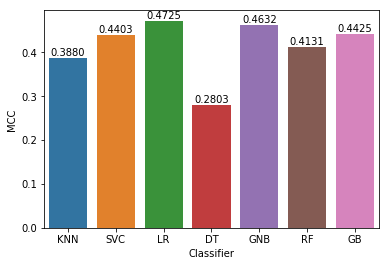

In [16]:
axis = sns.barplot(x = 'Name', y = 'Score', data = kf_cross_val)
axis.set(xlabel='Classifier', ylabel='MCC')
for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, height + 0.005, '{:1.4f}'.format(height), ha="center") 
    
plt.show()

From the above figure, we can see that the MCC score of **Logistic Regression**, **Support Vector Classifier**, **Gaussian Naive Bayes**, and **Random Forest** have out-performed the benchmark model (0.4368). In addition, Logistic Regression managed to achieve a Matthews correlation coefficient of 0.4725, which performs better than others. This will be selected as the prime candidate for the next stage.

## Stage 5— Feature Selection
In the initail model evaluation stage, we adopt all the features to build our initial model. Most of the time, however, there are features that don’t improve the model. Here we use Recursive Feature Elimination (RF) provided by _Scikit Learn_ library that recursively removes attributes with least importance and building a model on those attributes that remain.

In [17]:
from sklearn.feature_selection import RFECV
logreg_model = LogisticRegression()
rfecv = RFECV(estimator=logreg_model, step=1, cv=kfold, scoring=scoring_fnc)
rfecv.fit(X_train, y_train)

RFECV(cv=KFold(n_splits=10, random_state=42, shuffle=False),
   estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
   n_jobs=1, scoring=make_scorer(performance_metric), step=1, verbose=0)

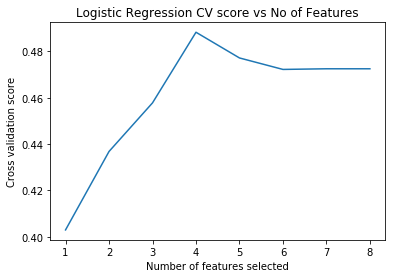

In [18]:
plt.figure()
plt.title('Logistic Regression CV score vs No of Features')
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

By looking at the plot we can see that inputting 4 features to the model gives the best MCC score. we can find out the features which contribute the most to predicting by using RFECV's `support_` attribute.

In [19]:
feature_importance = list(zip(feature_names, rfecv.support_))
new_features = []
for key,value in enumerate(feature_importance):
    if(value[1]) == True:
        new_features.append(value[0])
        
print(new_features)

['Pregnancies', 'Glucose', 'BMI', 'DiabetesPedigreeFunction']


The above 4 features are most suitable for the model. We can compare the MCC score before and after feature selection.

In [20]:
# Calculate accuracy scores 
X_new = sc.fit_transform(diabetes_mod[new_features])

X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new,
                                                    y, stratify = diabetes_mod.Outcome, 
                                                    test_size = 0.2,
                                                    random_state=0)

initial_score = cross_val_score(logreg_model, X_train, y_train, cv=kfold, scoring=scoring_fnc).mean()
print("Initial MCC score : {} ".format(round(initial_score, 4)))

fe_score = cross_val_score(logreg_model, X_train_new, y_train_new, cv=kfold, scoring=scoring_fnc).mean()
print("MCC score after Feature Selection : {} ".format(round(fe_score, 4)))

Initial MCC score : 0.4725 
MCC score after Feature Selection : 0.4883 


## Stage 6—Model Parameter Tuning
We have slightly improved the MCC score by feature selection. Here we then investigate the possiblility of further increasing the score by tweaking the parameters rather than just using default parameters provided by _Scikit Learn_. Instead of manually searching for optimum parameters, we can perform an _exhaustive_ search using the `GridSearchCV`, which does an exhaustive search over specified parameter values for an estimator.

In [22]:
from sklearn.model_selection import GridSearchCV


# Specify parameters
c_values_0 = list(np.arange(1, 10, 0.5))
c_values_1 = list(np.arange(1, 100, 10))
c_values_2 = list(np.arange(0.1, 1, 0.1))

intercept_scaling_values = list(np.arange(1, 10))

param_grid = [
    {'C': c_values_0, 'class_weight': [None, 'balanced'], 'penalty': ['l1'], 'solver' : ['liblinear'], 'multi_class' : ['ovr'], 'intercept_scaling' : intercept_scaling_values},
    {'C': c_values_1, 'class_weight': [None, 'balanced'], 'penalty': ['l1'], 'solver' : ['liblinear'], 'multi_class' : ['ovr'], 'intercept_scaling' : intercept_scaling_values},
    {'C': c_values_2, 'class_weight': [None, 'balanced'], 'penalty': ['l1'], 'solver' : ['liblinear'], 'multi_class' : ['ovr'], 'intercept_scaling' : intercept_scaling_values},
    {'C': c_values_0, 'class_weight': [None, 'balanced'], 'penalty': ['l2'], 'solver' : ['liblinear', 'newton-cg', 'lbfgs', 'sag'], 'multi_class' : ['ovr']},
    {'C': c_values_1, 'class_weight': [None, 'balanced'], 'penalty': ['l2'], 'solver' : ['liblinear', 'newton-cg', 'lbfgs', 'sag'], 'multi_class' : ['ovr']},
    {'C': c_values_2, 'class_weight': [None, 'balanced'],'penalty': ['l2'], 'solver' : ['liblinear', 'newton-cg', 'lbfgs', 'sag'], 'multi_class' : ['ovr']}
]


grid = GridSearchCV(LogisticRegression(), param_grid, cv=kfold, scoring=scoring_fnc)
grid.fit(X_train_new, y_train_new)

GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=False),
       error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'C': [1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0, 7.5, 8.0, 8.5, 9.0, 9.5], 'intercept_scaling': [1, 2, 3, 4, 5, 6, 7, 8, 9], 'solver': ['liblinear'], 'penalty': ['l1'], 'multi_class': ['ovr'], 'class_weight': [None, 'balanced']}, {'C': [1, 11, 21, 31, 41, 51, 61, 7...0000002], 'solver': ['liblinear', 'newton-cg', 'lbfgs', 'sag'], 'class_weight': [None, 'balanced']}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=make_scorer(performance_metric), verbose=0)

In [23]:
print(grid.best_params_)
print(grid.best_estimator_)

{'C': 1.0, 'intercept_scaling': 6, 'solver': 'liblinear', 'penalty': 'l1', 'multi_class': 'ovr', 'class_weight': 'balanced'}
LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=6, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l1', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)


In [24]:
pt_score = cross_val_score(grid.best_estimator_, X_train_new, y_train_new, cv=kfold, scoring=scoring_fnc).mean()

print("MCC score after Parameter Tuning : {} ".format(round(fe_score, 4)))

MCC score after Parameter Tuning : 0.4883 


Finally, feed the best parameters to the Logistic Regression model and observe whether MCC score using testing set  has increased.

In [25]:
logreg_model_pt = grid.best_estimator_


logreg_model.fit(X_train_new, y_train_new)
logreg_model_pt.fit(X_train_new, y_train_new)


fe_test_y_pred = logreg_model.predict(X_test_new)
pt_test_y_pred = logreg_model_pt.predict(X_test_new)


print("MCC test score after feature engineering: {}".format(round(matthews_corrcoef(y_test_new, fe_test_y_pred), 4)))
print("MCC test score after parameter tuning: {}".format(round(matthews_corrcoef(y_test_new, pt_test_y_pred), 4)))

MCC test score after feature engineering: 0.5138
MCC test score after parameter tuning: 0.551


We can see that the hyper-parameter tuning didn’t increase MCC score on testing set. Maybe the chosen hyper-parameters weren’t indicative enough.